In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Numpy Tutorials: Fast Fourier Transform: The First Three Natural Frequencies

### In This Tutorial You Will Learn:
 1. Generate a sine wave and plot graph
 2. Plot time series data
 3. Generate FFT utilizing sine wave data
 4. Using FFT plot amplitude vs frequency graphs
 5. Upload experimental data using np.loadtxt function
 6. Find natural frequencies of vibrating beam using experimental data


### What is Fast Fourier Transform (FFT)?

   A Fast Fourier Transform is a fundamental concept in the world of engineering. It is specifically used in the field of vibrations and measuring frequencies of various devices. FFT is primarily used to compute discrete functions, such as trigonometric functions, time it takes to complete a cycle, etc. Whereas, the FFT utilizes signals of any device/function and converts them from time domains into frequency domains [1] . As a result, you are able to associate frequencies to the devices at certain vibrations at certain times. In turn, the correlated frequencies are considered to be "natural frequencies" due to the vibrations being unforced [2]. 
   

#### Example 1: Associating Natural Frequencies to a Sine Function

For the first example of setting up a Fast Fourier Transform, you will take a look into a sin wave and generate it's natural frequencies at each peak.
     You will define a sin wave in terms of frequency, a certain value of samples over a certain time frame, in this case a 100 Hz wave frequency over a 10 second period:

In [31]:
N_freq = 100 #sample size of frequencies, in terms of Hertz
time = 10 #duration of sin function, in terms of seconds
wave_freq = N_freq * time #this outputs a wave frequency over the given time frame

#define a sine wave function in terms of the listed variables
def sine_function(frequency, N_freq, time):
    x = np.linspace(0, time, wave_freq) 
    y = np.sin((2 * np.pi * x)) #sine function that utilizes the variables associated with 'x'
    return x,y

Once defining the sine wave function that implements frequency over a certain period of time, you can proceed to graph this data to output a sine wave graph:

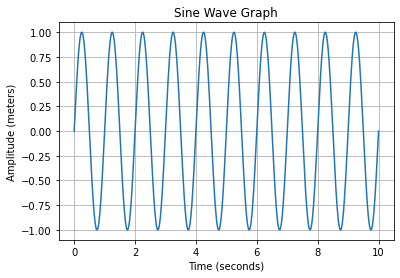

In [32]:
x, y = sine_function(100, N_freq, time) #x and y variables are 'returned' when you define the function
plt.title('Sine Wave Graph')
plt.plot(x, y)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (meters)')
plt.grid('True')
plt.show()

Now that you have created a sine wave, you can generate a code to convert this function to output corresponding natural frequencies, in order to get started you will use the Numpy scipy.fft function. With this function you will be able to create a FFT for a provided function, in this case, you will use this to create a transform of the sine function. You can test several different range options to view the 1st, 2nd, 3rd, etc. frequencies from the sine wave graph:

No handles with labels found to put in legend.


(0.0, 2.0)

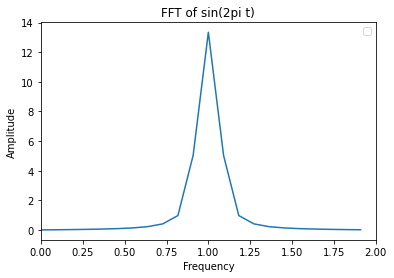

In [33]:
N_freq = 100 
time = 10 
wave_freq = N_freq * time 
x = np.linspace(0, time, wave_freq)
y = np.sin((2 * np.pi * x))
func = np.fft.fft(y) # np.fft.fft(y) is the numpy function used to generate the FFT of a data

for N in [20]: # take a range for a given sample size and focus on generating a FFT for it
    step = (10) / (N+1) #create a step size of 10 seconds over 20 samples (due to 20 being the range)
    t = np.arange(0,10+step, step) # use np.arange function for the time to start at 0 and end at 10 + step
    func= np.sin(2*np.pi*t) # this is the function of the overall graph
    FFT= np.fft.fft(func) # converts the sine wave data into FFT
    freq_step = (N/time) / len(FFT) # freq_step in order to create a step function using samples over time and divide by the number of items in the FFT generated
    freqs = np.arange(0,N/time, freq_step)
    plt.plot(freqs, np.absolute(FFT))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT of sin(2pi t)')
plt.legend()
plt.xlim((0,2))

As shown above, a natural frequency wave was generated for a range of 20, you can then further explore this function by increasing the range as shown by the following 2 graphs. Where the ranges go from 0 to 3 Hertz and 0 to 4 Hertz:

Ex - Range from 0 to 3 Hertz FFT graph of sin(2pi):

No handles with labels found to put in legend.


(0.0, 3.0)

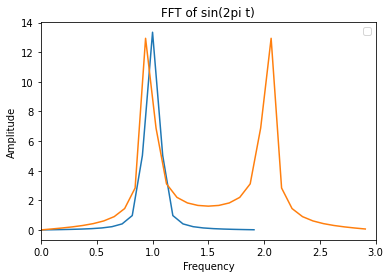

In [34]:
for N in [20, 30]:
    step = (10) / (N+1)
    t = np.arange(0,10+step, step)
    func= np.sin(2*np.pi*t)
    FFT= np.fft.fft(func)
    freq_step = (N/time) / len(FFT)
    freqs = np.arange(0,N/time, freq_step)
    plt.plot(freqs, np.absolute(FFT))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('FFT of sin(2pi t)')
plt.legend()
plt.xlim((0,3))

Ex - Range from 0 to 4 Hertz FFT graph of sin(2pi):

No handles with labels found to put in legend.


(0.0, 4.0)

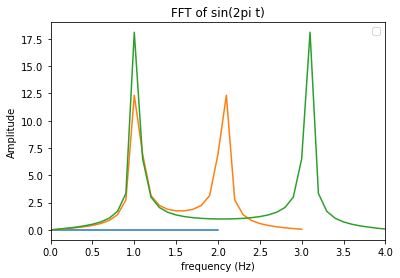

In [35]:
for N in [20,30,40]:
    step = (10) / (N+1)
    t = np.linspace(0,10,N+1)
    func= np.sin(2*np.pi*t)
    FFT= np.fft.fft(func)
    freq_step = (N/time) / len(FFT)
    freqs = np.linspace(0,N/time, len(FFT))
    plt.plot(freqs, np.absolute(FFT))
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of sin(2pi t)')
plt.legend()
plt.xlim((0,4))

As the range increased, you are able to obtain more FFT/natural frequencies from the original sine function from above. There is no frequency when collecting 2 hertz, whereas, collecting at 3 hertz you obtain peaks at 1 and 2 hertz and collecting at 4 hertz results in peaks at 3 and 1 hertz.
This also goes to show that as as more samples are generated, there will be a smaller step size which will result in sharper peaks.

### Example 2: Using FFT in relation to beam mechanicsSources:

        

Another way you are able to implement the FFT is by applying to an actual object. For instance, you can take a look at a cantilever beam that is attached to a strain gauge. You then apply a force to the free end of the beam and let it vibrate for a certain time frame. Then by using the labview workbench, it can output the following frequencies as shown below:

![cantilever_beam](./beam.png)

Figure 1: This figure represents a cantilever beam. At the fixed end, there is a clamp holding down the beam and the other end is a free end. In order to obtain data to obtain natural frequencies, a hammer applies a force on the free end which results in vibrations across the beam. With this, you can calculate the natural frequencies by utilizing FFT as follows:

From this data you can plot a strain vs time graph, where all the data in column 0 is time and all the data in column 1 is strain:

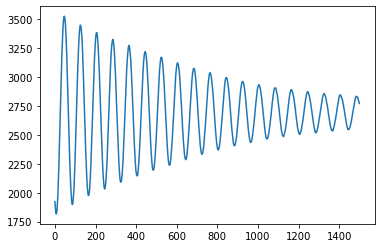

In [36]:
data = np.loadtxt('./Beam_1/f1612.lvm')
plt.plot(data[9500:11000, 1]) # time and strain data for the cantilever beam

The graph above represents the time vs strain graph generated by the given data for the cantilever beam. This data represents the vibrations experienced by the beam once due to the force of the hammer hitting it. As a result with these vibrations, you can implement the same steps shown in "Example 1" of this tutorial to generate a FFT graph to show the natural frequency of the data shown above:

(0.0, 50.0)

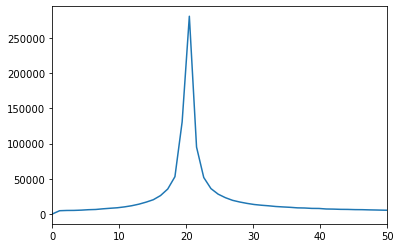

In [37]:
Y = data[9500:11000,1]
time = data[11000,0] - data[9500,0]
N = len(Y)
FFT = np.fft.fft(Y- np.mean(Y))
freqs = np.linspace(0, N/(time), N)
plt.plot(freqs, np.absolute(FFT))
plt.xlim(0,50)

As shown above, you can look at a range of 0 to 50 hertz and it shows the first natural frequency of the given range of the strain vs time graph. With this data, you can further compute a code in order to locate at which point that natural frequency is:

In [38]:
imax = np.argmax(np.absolute(FFT[0:1000])) #the argmax function helps identify where the peak is located with the data generated
freqs[imax]

20.44373668467149

By implementing the function "argmax" you can take the absolute value of the Fourier Transform to locate where that peak is taking place. By doing so, you obtain the value of 20.44373668467149 Hertz for the first natural frequency of the generated data.

Sources:
1. [Ref_01](https://www.princeton.edu/~cuff/ele201/kulkarni_text/frequency.pdf) : Frequency Domain and Fourier Transforms 
2. [Ref_02](https://www.brown.edu/Departments/Engineering/Courses/En4/Notes/vibrations_free_undamped/vibrations_free_undamped.htm) : Introduction to Dynamics and Vibrations
